In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Experimental Results
names = ['compitoa', 'compitomin', 'copyvet1_10', 'copyvet50disp', 'isort', 'minmiconcorrenti', 'mins2', 'mysqrt', 'raddirzzamentomediavoti', 'ricopiavaloriesternirange', 'ricopiavaloriinternirange', 'vet20parinum']
results = [
    ('(0, 1)', [79.411766, 80.9252385, 70, 89.47369, 84, 55, 75, 82.4561, 86.95652, 68.965515, 64.28571, 82.08955]),
    ('(0, 2)', [73.529, 73.81, 80, 88.158, 90.18, 68.421, 60.714, 82.4561, 86.95652, 62.068962, 67.85714, 85.82089]),
    ('(0, 3)', [67.64706, 71.42857, 80, 88.15789, 90.8, 68.42105, 60.714, 82.4561, 86.95652, 62.06862, 67.85714, 85.82089])
]

number_of_trials = len(results)
width = (1 - 0.1)/number_of_trials
ind = np.arange(len(names))

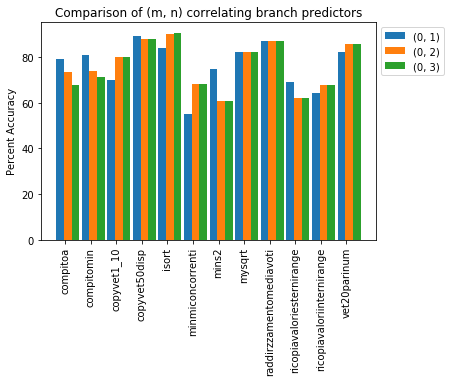

In [61]:
fig, ax = plt.subplots()
ax.set_ylabel("Percent Accuracy")
ax.set_title("Comparison of (m, n) correlating branch predictors")
ax.set_xticks(ind)
ax.set_xticklabels(names)
i = -len(names)/(2*number_of_trials)
for test in results:
    name = test[0]
    data = test[1]
    ax.bar(ind + (i)*width/len(results), 
           data, 
           width, 
           label=name)
    i=i+number_of_trials
    
ax.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.xticks(rotation=90)
plt.show()